In [3]:

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
odf = pd.read_csv('TimeSeries.csv', sep=',')
df = odf.copy()
df['time'] = pd.to_datetime(df['time'])
df.set_index('time')


def plot_df(df, x, y, title="", xlabel='time', ylabel='sample', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='silver')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    return plt




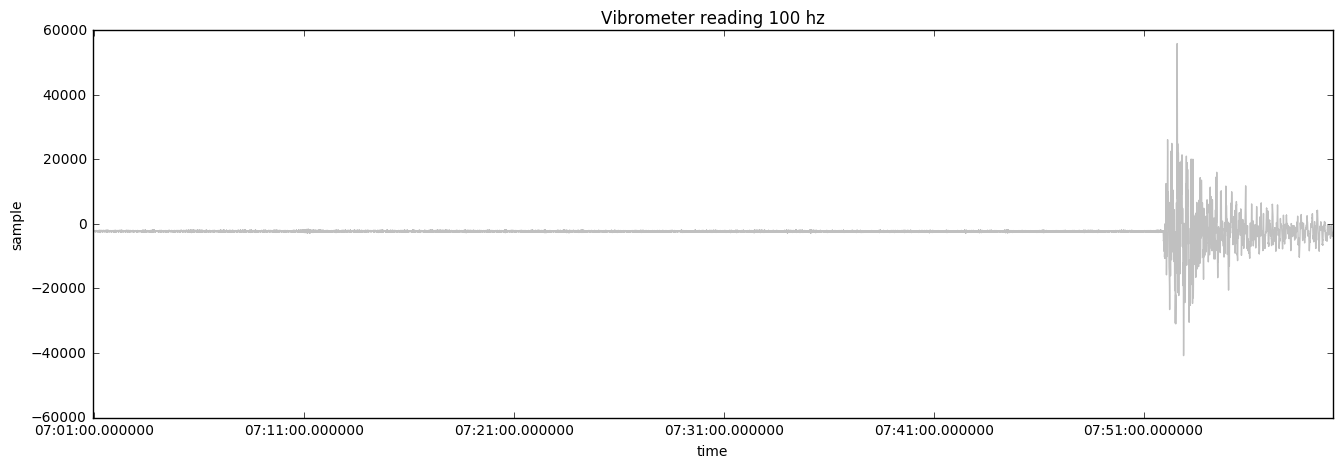

In [43]:
plt = plot_df(df, x=df['time'], y=df['sample'], title='Vibrometer reading 100 hz')

plt.show()

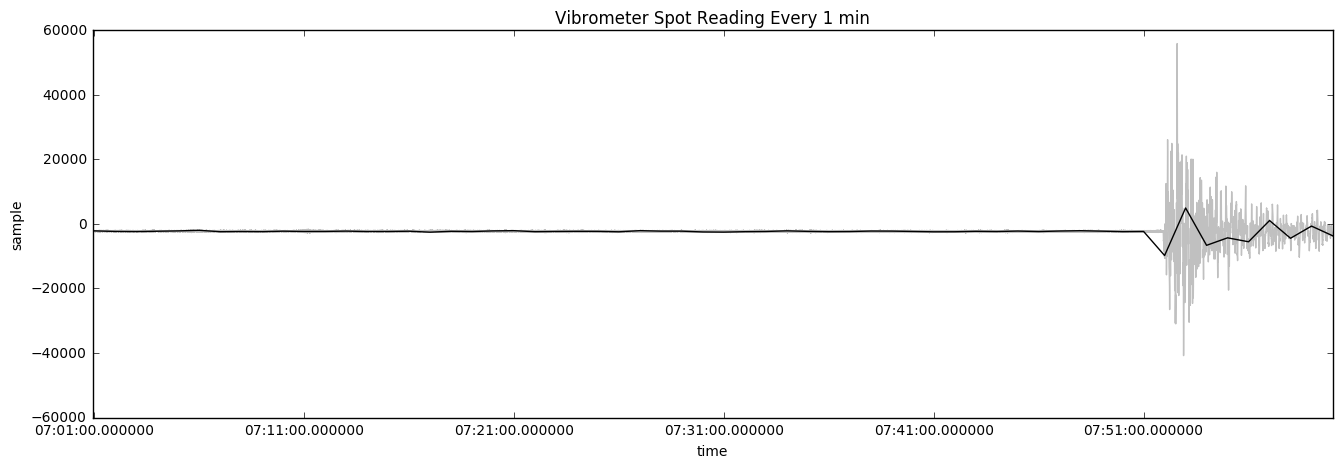

In [41]:
plt = plot_df(df, x=df['time'], y=df['sample'], title='Vibrometer Spot Reading Every 1 min')
#plt.show()



minuite = odf.copy()


#minuite['time'] = minuite['time'].to_string()
isit =  minuite['time'].str.contains('00.0000')
minuite =minuite[isit]
    

    


minuite['time'] = pd.to_datetime(minuite['time'])
minuite.set_index('time')


plt.plot(minuite['time'], minuite['sample'], color='black')
plt.show()

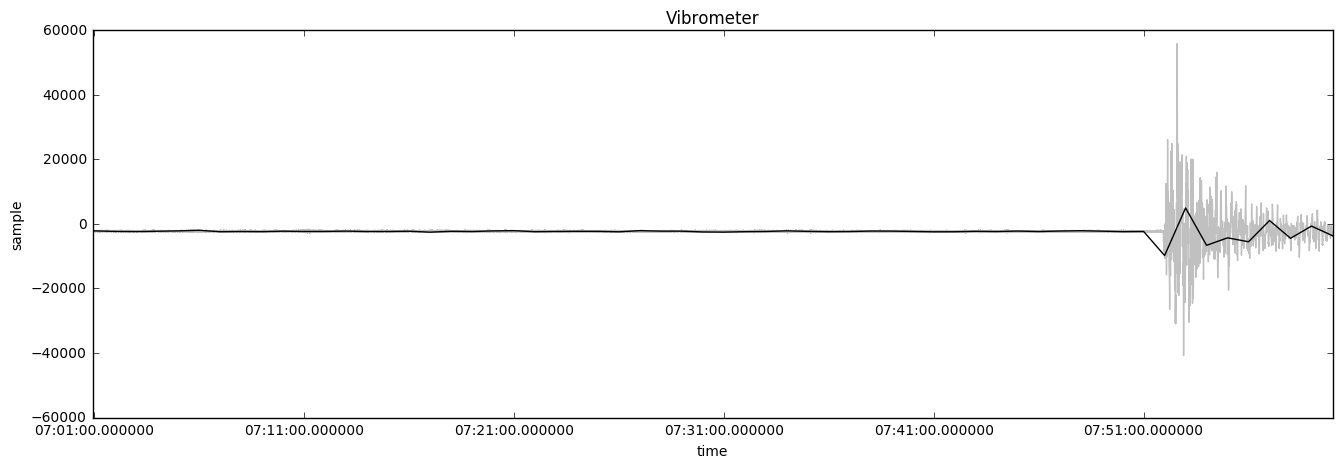



Averaging values windowing once every 1 minuite

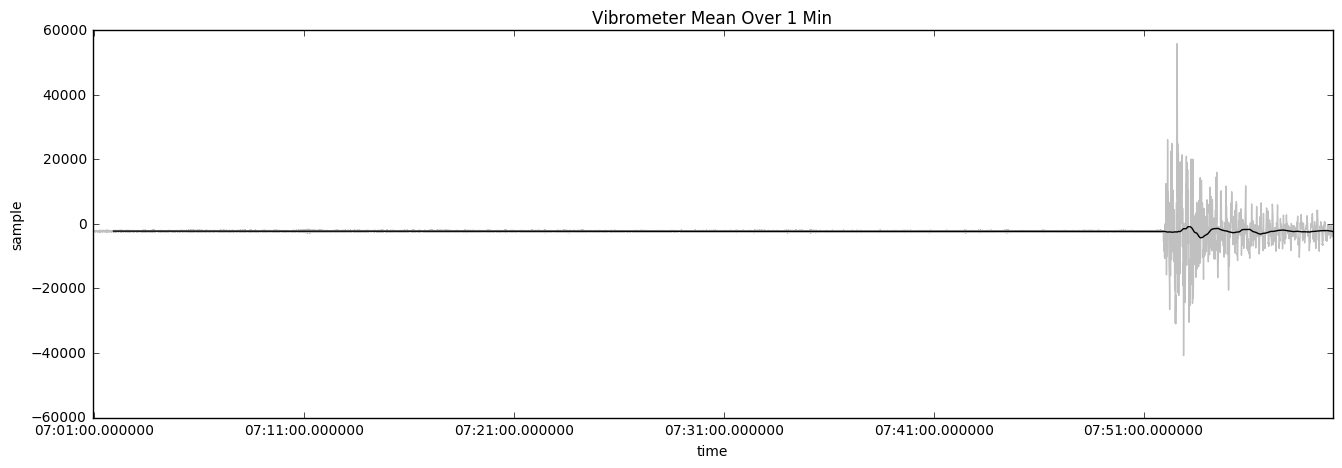

In [45]:
plt2 = plot_df(df, x=df['time'], y=df['sample'], title='Vibrometer Mean Over 1 Min')
#plt.show()

#print(odf)

movingAverage = odf.copy()

movingAverage = movingAverage.rolling(6000, win_type='triang').mean()





plt2.plot(movingAverage['time'], movingAverage['sample'], color='black')
plt2.show()

    Standard Deviation

SyntaxError: invalid syntax (<ipython-input-47-52807bd1265d>, line 8)

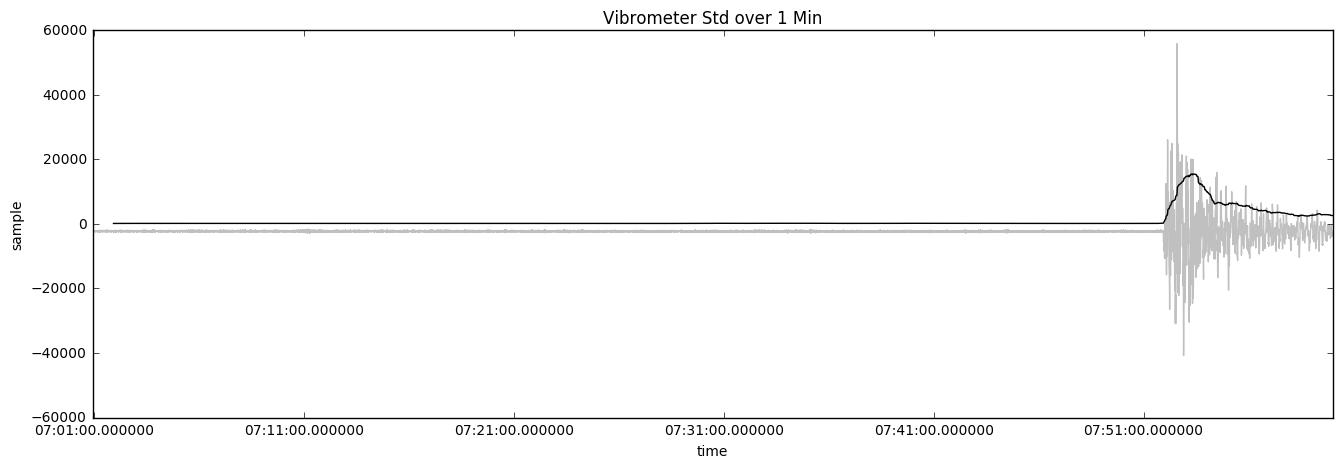

In [50]:
plt = plot_df(df, x=df['time'], y=df['sample'], title='Vibrometer Std over 1 Min')


minuite = odf.copy()



   

minuite['time'] = pd.to_datetime(minuite['time'])
minuite.set_index('time')
minuite['sample'] = minuite['sample'].rolling(window=6000,center=False).std() 

plt.plot(minuite['time'], minuite['sample'], color='black')
plt.show()

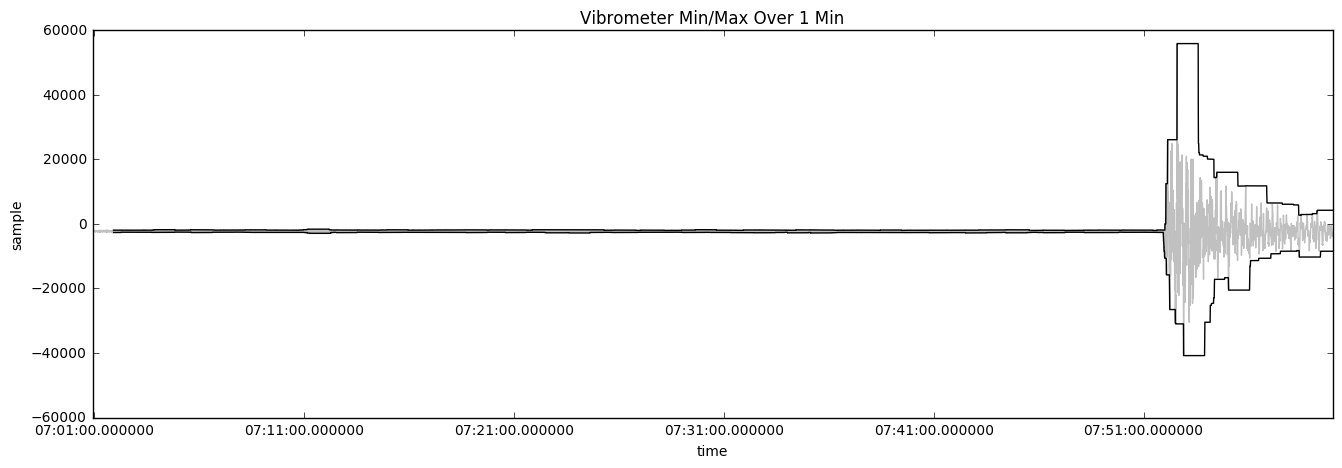

In [51]:
plt = plot_df(df, x=df['time'], y=df['sample'], title='Vibrometer Min/Max Over 1 Min')


minuite = odf.copy()



   

minuite['time'] = pd.to_datetime(minuite['time'])
minuite.set_index('time')

minuite['max'] = minuite['sample'].rolling(window=6000,center=False).max() 
plt.plot(minuite['time'], minuite['max'], color='black')

minuite['sample'] = minuite['sample'].rolling(window=6000,center=False).min() 
plt.plot(minuite['time'], minuite['sample'], color='black')



plt.show()